In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos desde la pagina sin necesidad de adjuntar la base de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

In [3]:
# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Normalización de los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

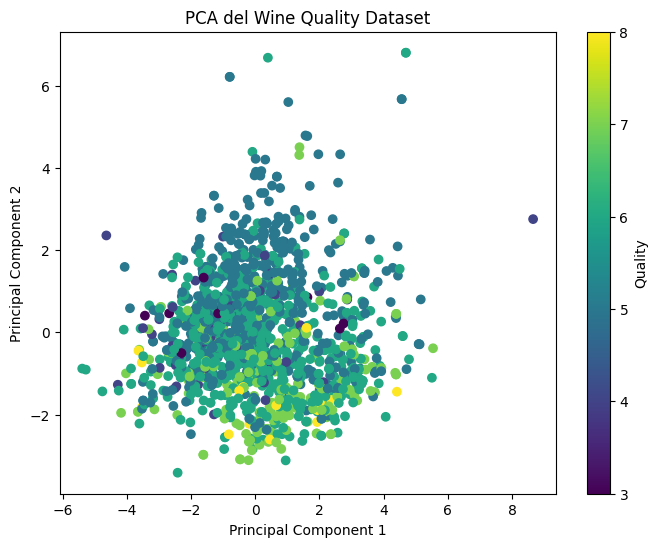

In [4]:
# Aplicación de PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la columna de calidad
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# Visualización de los componentes principales
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['quality'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA del Wine Quality Dataset')
plt.colorbar(label='Quality')
plt.show()
